In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import os
import json
import pylab as pl
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

import matplotlib
%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##SIMULATED DATA: A SINE WAVE WITH A PERIOD OF 2$\pi$/10 . 
 #WHAT DOES IT LOOK LIKE IN FOURIER SPACE?

In [2]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

sample_rate = 44
duration = 2

N = duration * sample_rate
freq = 8 / duration
period = 1.0 / freq

print ("PERIOD = ", period)
x = np.linspace(0, duration, num = N)
sinewave = np.sin(2 * np.pi * freq * x)
ax.plot(x, sinewave, '.', ms=50, label= "period = %.2f"%period);
ax.plot(x, sinewave, '-', label = "sine wave");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("seconds", fontsize=20)
pl.title("signal", fontsize=20)

PERIOD =  0.25


Text(0.5,1,'signal')

In [3]:
np.fft?

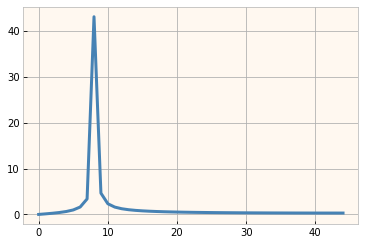

In [4]:
pl.plot(np.abs(np.fft.rfft(sinewave)))

In [5]:
f = np.abs(np.fft.rfft(sinewave))


fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), '-')

ax.set_xticklabels([ "%.2f"%(f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20)

Text(0.5,1,'Power Spectrum')

USE numpy.fft.rfft to take the fourier transform of the REAL part of your data (always real for us in time series) only 

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,0,'frequency [0, ... , 1/(2-i)*sample_rate] Hz')

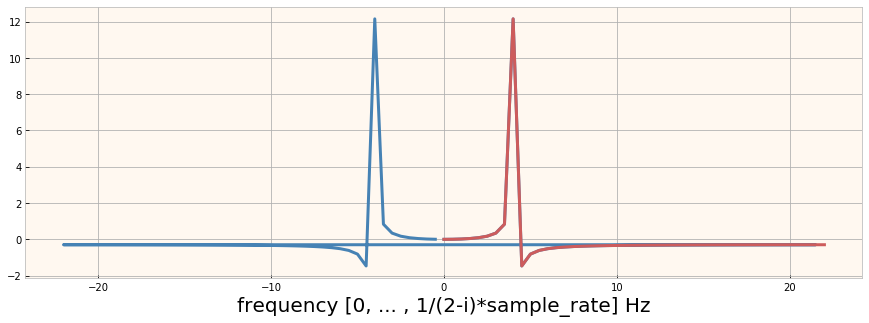

In [6]:

f = np.fft.fft(sinewave)

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.fftfreq(N, 1.0/sample_rate), f)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), np.fft.rfft(sinewave))
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20)

take the absolute value of the FFT to suppress imaginary terms and get a positive POWER

[  1.98729921e-14   1.22012321e-01   2.56100914e-01   4.18618951e-01
   6.38103783e-01   9.76902210e-01   1.61361023e+00   3.37725495e+00
   4.31285105e+01   4.64333065e+00]


Text(0.5,0,'frequency [0, ... , 1/(2-i)*sample_rate] Hz')

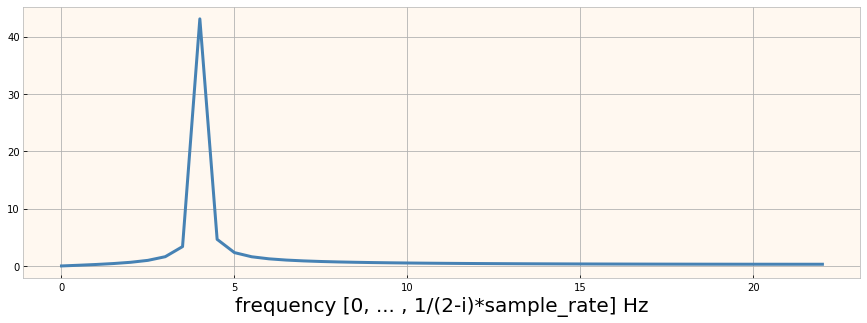

In [7]:
f = np.abs(np.fft.rfft(sinewave))
print (f[:10])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), f)
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20)

In [8]:
import pandas as pd
import statsmodels as sm
from statsmodels import tsa
# this is an artificial dataset, mimiching the time behavior of trashpickup in NYC
trash = pd.read_csv("nyc_weekly_refuse.csv")
trash.head()
#trash.describe()

Unnamed: 0 Dump_Time_Stamp  Tons_Collected
0           0      2000-01-02      102.835277
1           1      2000-01-09      111.559529
2           2      2000-01-16      110.350627
3           3      2000-01-23      106.082784
4           4      2000-01-30       97.351591

There are n=209 datapoints in the series


Text(0,0.5,'Tons of trash')

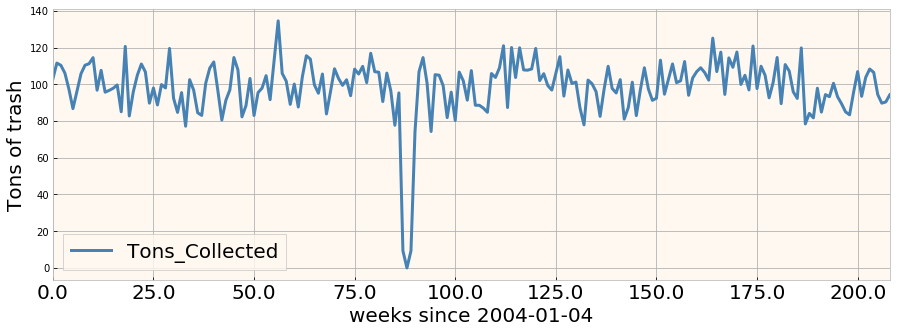

In [9]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
N = len(trash)
print ("There are n=%d datapoints in the series"%N)
ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax = trash.plot(x='Dump_Time_Stamp', y='Tons_Collected', ax=ax)
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '.', ms=50, label= "period = ?");
#ax.plot(trash.Dump_Time_Stamp, trash.Tons_Collected, '-', label = "trash pickup");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("weeks since 2004-01-04", fontsize=20)
pl.ylabel("Tons of trash", fontsize=20)


Text(0.5,0,'frequency (1/week)')

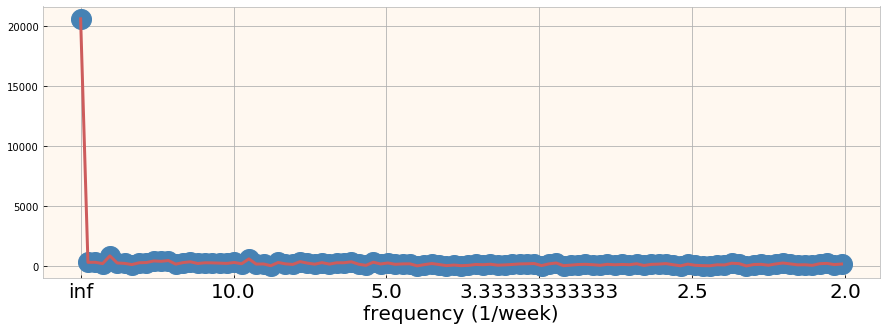

In [10]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20)

In [11]:
print ("What is on the x-axis of the FFT?")
print ("The FT is calculated at: " + "xax = [0, 1, ...,     N/2-1,     (N)/2] / (d*n) " +
       "(xax = [0, 1, ...,     N/2-1,     (N-1)/2] / (d*n) of n is odd)",
       "in units of inverse frequency where n is the size of the input array and d " + 
       "is the Sample spacing: what is the distance between datapoints in input array " + 
       "in units of weeks the Sample spacing here is 1 (1 measurement per week)")
print ("To get the FREQUENCY on the x axis we take 1.0/xax")
print ("The first two frequency caculated are infinity (1.0/0) ",
       "and the frequency corresponding to the entire duration of the series = N*d,"
       " and should be removed because they are uninteresting\n",
       np.fft.rfftfreq(N, 1.0)[0], "or ", 1.0/np.fft.rfftfreq(N, 1.0)[0], "and\n",
       np.fft.rfftfreq(N, 1.0)[1], "or every %.1f"%(1.0/np.fft.rfftfreq(N, 1.0)[1]), "weeks\n\n")

print ("The fastest frequency you can calculate id every 1.0/2*d, "
       "called the Nyquist frequency\n",
       np.fft.rfftfreq(N, 1.0)[-1],  "or every %.1f"%(1.0/np.fft.rfftfreq(N, 1.0)[-1]), "weeks")

What is on the x-axis of the FFT?
The FT is calculated at: xax = [0, 1, ...,     N/2-1,     (N)/2] / (d*n) (xax = [0, 1, ...,     N/2-1,     (N-1)/2] / (d*n) of n is odd) in units of inverse frequency where n is the size of the input array and d is the Sample spacing: what is the distance between datapoints in input array in units of weeks the Sample spacing here is 1 (1 measurement per week)
To get the FREQUENCY on the x axis we take 1.0/xax
The first two frequency caculated are infinity (1.0/0)  and the frequency corresponding to the entire duration of the series = N*d, and should be removed because they are uninteresting
 0.0 or  inf and
 0.00478468899522 or every 209.0 weeks


The fastest frequency you can calculate id every 1.0/2*d, called the Nyquist frequency
 0.497607655502 or every 2.0 weeks


Text(0.5,1,'Trash pickup power spectrum')

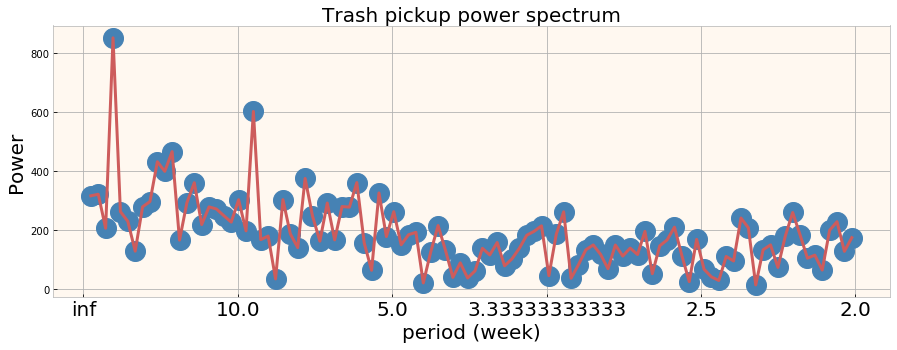

In [12]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (week)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)

Below I am removing the first entry of the FFT output array because, as explained in point 2, it is not physically interesting and it is always a very large number. By plotting the points [1:], i.e. the FFT omitting its first value, i can see what happens much better, since the high value at [0] was forcing the y range in the plot to be very large. In your homework you will have to not only plot without the first (and likely second) elements of the FT but also no use them when you look for FT peaks to identify important periods.


Text(0.5,1,'Trash pickup power spectrum')

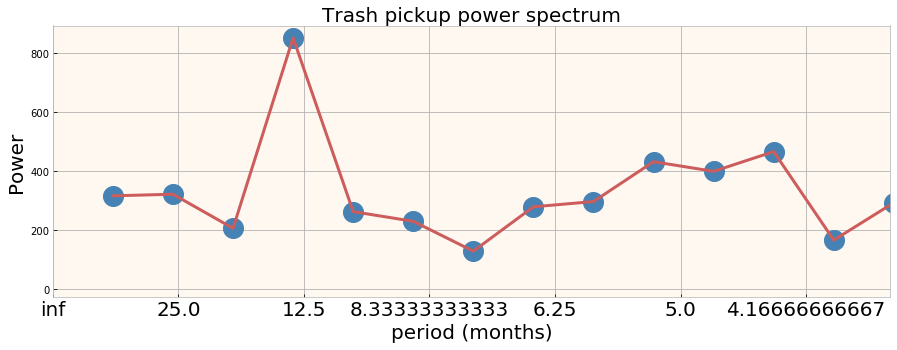

In [16]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/15)
ax.set_xticklabels([ "%s"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (months)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)

Text(0.5,1,'Trash pickup power spectrum')

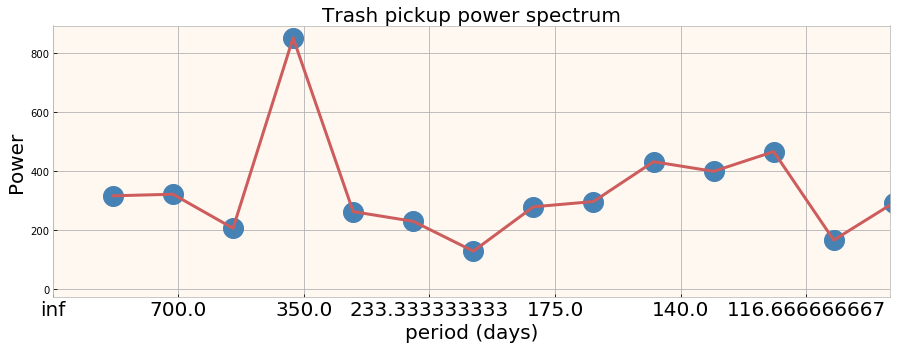

In [17]:
f = np.abs(np.fft.rfft(trash.Tons_Collected))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(0,1.0/15)
ax.set_xticklabels([ "%s"%(1*7./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("period (days)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Trash pickup power spectrum", fontsize=20)